Shapes: (625, 1000) (125, 200)


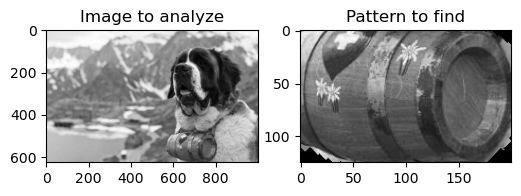

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("./assets/dog.png", cv2.IMREAD_GRAYSCALE)
kernel = cv2.imread("./assets/pattern-to-find.png", cv2.IMREAD_GRAYSCALE)

img = img.astype(np.int64)
kernel = kernel.astype(np.int64)

img[:] -= 128  
kernel[:] -= 128

# img[:] /= 255
# kernel[:] /= 255

print('Shapes:', img.shape, kernel.shape)

_, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(img + 128, cmap='gray')
axs[0].set_title('Image to analyze')

axs[1].imshow(kernel + 128, cmap='gray')
axs[1].set_title('Pattern to find')
plt.show()

In [15]:
from math import sqrt
def cosine_similarity(a1, a2):
  euclidean_norm = lambda a: sqrt((a**2).sum())
  return np.dot(a1, a2) / (euclidean_norm(a1) * euclidean_norm(a2))

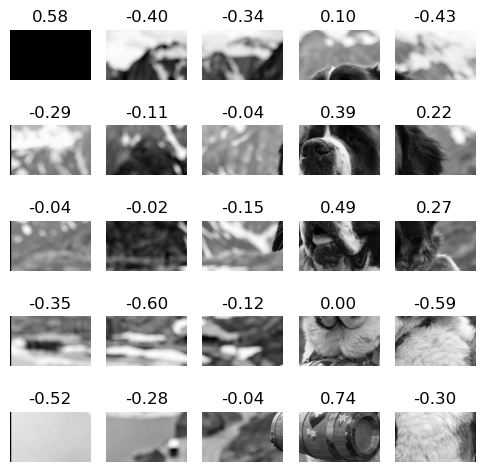

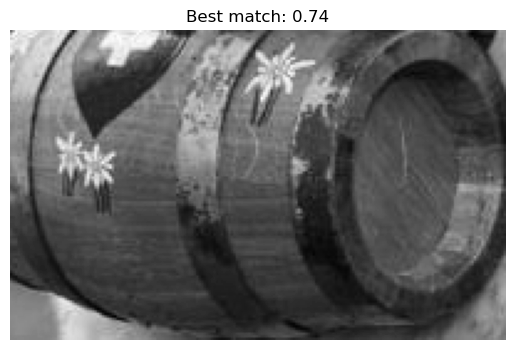

In [30]:
x_repeat = img.shape[0] // kernel.shape[0]
y_repeat = img.shape[1] // kernel.shape[1]

_, axs = plt.subplots(x_repeat, y_repeat, figsize=(6, 6))

best_match = kernel
best_match_score = 0
for i in range(x_repeat):
    for j in range(y_repeat):
            
        x_start = i * kernel.shape[0]
        x_end = x_start + kernel.shape[0]
        y_start = j * kernel.shape[1]
        y_end = y_start + kernel.shape[1]

        img_slice = img[x_start:x_end, y_start:y_end]
        if i == 0 and j == 0:
            img_slice[:]= -125
        score = cosine_similarity(img_slice.flatten(), kernel.flatten())
        # score = np.dot(img_slice.flatten(), kernel.flatten()) // 10_000_000
        axs[i, j].imshow(img_slice + 128, cmap='gray')
        axs[i, j].set_title(f'{score:.2f}')
        axs[i, j].axis('off')
        if score > best_match_score:
            best_match_score = score
            best_match = img_slice
plt.show()

plt.imshow(best_match + 128, cmap='gray')
plt.axis('off')
plt.title(f'Best match: {best_match_score:.2f}')
plt.show()